Ben Steves, CS344, Spring 2022, 2-1-22

## Setup

In [1]:
import torch
from torch import tensor
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

## Task

Suppose we have a dataset with just a single feature `x` and continuous outcome variable `y`.

In general we're going to be faced with a dataset with an unknown and probably nonlinear relationship. But for now let's use a simple dataset with a known linear relationship:

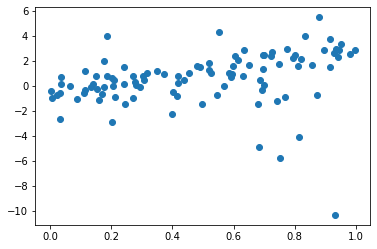

In [2]:
true_weights = 4.0
true_bias = -1.0

# Make the randomness consistent
torch.manual_seed(0)
# Use random x values
x = torch.rand(100)
# Generate random noise, same shape as *x*, that has some outliers.
noise = torch.distributions.studentT.StudentT(2.0).sample(x.shape)
# For a simpler variant, use  torch.randn_like(x).
#print(f"Noise mean: {noise.mean()}, noise variance {noise.var()}")
# Generate true y values 
y_true = true_weights * x + noise + true_bias
# Make a scatterplot. The semicolon at the end says to ignore the return value.
plt.scatter(x, y_true);

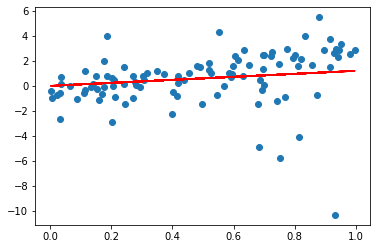

In [11]:
slope = 1.2
bias = 0.0
y_pred = slope * x + bias
plt.scatter(x, y_true); plt.plot(x, y_pred, 'r');

In [12]:
@widgets.interact(slope=(-5.0, 5.0))
def plot_linreg(slope):
    y_pred = slope * x + bias
    plt.scatter(x, y_true); plt.plot(x, y_pred, 'r');
    resid = y_true - y_pred
    mse = torch.mean(resid**2)
    mae = torch.mean(resid.abs())
    print(f"MSE: {mse}, MAE: {mae}")

interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0), Output()), _dom_classes=…

- Slope that minimizes MSE: 1.4
- Slope that minimizes MAE: 2.4
- Description of the difference: The MSE seems to be more affected by the outlier than MAE, alas why the slope for MAE is larger and fits in more with the main trend line.

### Gradient


In [20]:
def linreg_mse(slope):
    y_pred = slope * x + bias
    resid = y_true - y_pred
    mse = torch.mean(resid**2)
   # mae = torch.mean(resid.abs())
    return mse

mse_list = 1.0, 1.4, 1.8, 2.2

for i in mse_list:
    print(linreg_mse(i))

tensor(4.3255)
tensor(4.2745)
tensor(4.3272)
tensor(4.4838)


In [22]:
def compute_gradient(eps, x0):
    return (linreg_mse(x0 + eps) - linreg_mse(x0)) / eps

eps = 1e-3
x0_list = [0.0, 1.4, 2.4]

for x0 in x0_list:
    print(compute_gradient(eps, x0))

tensor(-0.9060)
tensor(0.0024)
tensor(0.6504)


1.4 was our best match for MSE, so it's gradient is closest to 0 of the three.

### Gradient Descent

(will do on my own time)

1. If the value of the gradient is positive, we need to move closer to 0 on the gradient scale, so the slope would need to decrease. 
2. On the flipside, slope would need to increase if the value of the gradient is < 0. 
3. The gradient when the parameter minimizes the MSE is 0.
4. To use MAE, we'd edit the linreg_mse() function to instead take the absolute value of the residuals and average them. 